In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import datetime
import glob
import os


ceiling = 2000
floor = 100
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2023, 12, 31)


headers = ["Date", "Price", "Postcode","Ownership", "Type", "SaleType"]
files = ["RG30","RG314","RG315","RG316"]
df = pd.concat(
    (pd.read_csv(f"./{file}.csv", usecols=headers).assign(Source=file) for file in files), 
    ignore_index=True
)
# df = df[(df.Postcode.str.startswith("RG31"))]
df = df[(df.SaleType != "Non-standard")]
df = df[(df.Ownership == "Freehold")]
#df = df[(df.Type != "Terraced")]
#df = df[(df.Type != "Flat")]
df = df[(df.Type == "Detached") | (df.Type == "Semi-detached")]
#df = df[(df.Type == "Semi-detached")]
#df = df[(df.Type == "Detached")]
df.Price = pd.to_numeric(df.Price).div(1000)

df = df[(df.Price < ceiling) & (df.Price > floor)]
df.Date = pd.to_datetime(df.Date, errors='coerce')
df = df[(df.Date > start) & (df.Date < end)]
df = df.sort_values(by=['Date'])
df.set_index('Date', inplace=True)

df30 = df[(df.Source == "RG30")]
df31 = df[(df.Source == "RG314") | (df.Source == "RG315") | (df.Source == "RG316")]
df315 = df[(df.Source == "RG315")]
df316 = df[(df.Source == "RG316")]

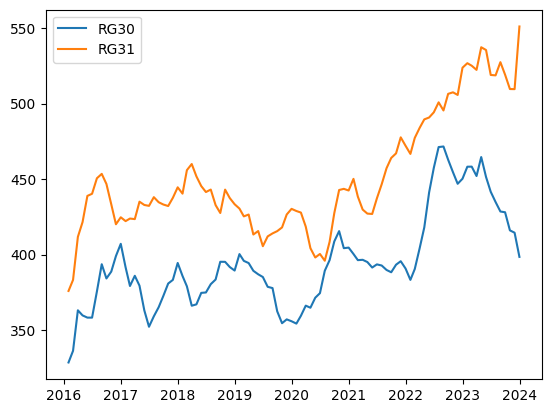

In [76]:
sample = "ME"
window = 6
win_type ='gaussian'
#plt.plot(df.Price.resample(sample).mean().rolling(window=window, min_periods=1, win_type=win_type).mean(std=3), label="All")
plt.plot(df30.Price.resample(sample).mean().rolling(window=window, min_periods=1, win_type=win_type).mean(std=3), label="RG30")
plt.plot(df31.Price.resample(sample).mean().rolling(window=window, min_periods=1,  win_type=win_type).mean(std=3), label="RG31")
#plt.plot(df315.Price.resample(sample).mean().rolling(window=window, min_periods=1).mean(), label="RG315")
#plt.plot(df316.Price.resample(sample).mean().rolling(window=window, min_periods=1).mean(), label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()

In [58]:
monthly_counts = df[(df.Price > floor)].resample('ME').size()
monthly_counts_30 = df30[(df30.Price > floor)].resample('ME').size()
monthly_counts_31 = df31[(df31.Price > floor)].resample('ME').size()
monthly_counts_315 = df315[(df315.Price > floor)].resample('ME').size()
monthly_counts_316 = df316[(df316.Price > floor)].resample('ME').size()
print(monthly_counts_31.tail(36))

Date
2021-01-31    16
2021-02-28     6
2021-03-31    17
2021-04-30     3
2021-05-31     5
2021-06-30    17
2021-07-31     1
2021-08-31     5
2021-09-30    12
2021-10-31     3
2021-11-30     8
2021-12-31     4
2022-01-31     3
2022-02-28     5
2022-03-31     5
2022-04-30     5
2022-05-31     9
2022-06-30     4
2022-07-31     8
2022-08-31    10
2022-09-30    11
2022-10-31     5
2022-11-30     5
2022-12-31    10
2023-01-31     6
2023-02-28     6
2023-03-31     5
2023-04-30     5
2023-05-31     4
2023-06-30     1
2023-07-31     8
2023-08-31    11
2023-09-30     8
2023-10-31     2
2023-11-30     3
2023-12-31     1
Freq: ME, dtype: int64


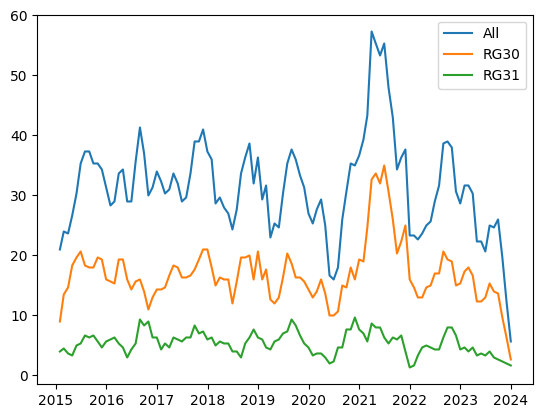

In [28]:
plt.plot(monthly_counts.rolling(window=3, min_periods=1).mean(), label="All")
plt.plot(monthly_counts_30.rolling(window=3, min_periods=1).mean(), label="RG30")
plt.plot(monthly_counts_31.rolling(window=3, min_periods=1).mean(), label="RG31")
#plt.plot(monthly_counts_315.rolling(window=6).mean(), label="RG315")
#plt.plot(monthly_counts_316.rolling(window=6).mean(), label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()